In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Question 1

In [2]:
# Q1
def greeting(name, date, Spanish=False):
    if Spanish == True:
        print('Helo, ' + name + '! Hoy es: ' + date + "!")
    else:
        print("Hello, " + name + ". Today is: " + date + ".")


greeting('Boss','Monday')
greeting('Jefe','Lunes',Spanish = True)

Hello, Boss. Today is: Monday.
Helo, Jefe! Hoy es: Lunes!


### Question 2

In [3]:
# Q2
def print_odd_numbers(a,b):

    if a>b or int(a)!=a or int(b)!=b or a%2==0 or b%2==0:
        print("Error Message. Does not meet the condition")
        return

    x = a;
    while x <= b:
        if x % 2 != 0:
            print(x)
        x = x + 2

print_odd_numbers(3,9)
print_odd_numbers(3,9.8)

3
5
7
9
Error Message. Does not meet the condition


### Question 3

In [4]:
# Q3
def stopping_time(N):
    L = np.arange(1, N + 1) * 0 + 0.0
 
    counter = 0
    for x in range(N):
        n = np.random.randint(N)
        L[x] = n
        while len(L[np.where(L==n)])>1:
            n=np.random.randint(N)
            L[x] = n
            counter = counter + 1
    return counter


print(stopping_time(10))

21


### Question 4

In [5]:
# Q5
import statistics
def sample(rfun,N,S):
    Sample = np.zeros(S)
    for x in range(S):
        Sample[x] = rfun(N)
    return Sample

Sample = sample(stopping_time, 10, 100000)

print("Median: " , statistics.median(Sample))

Median:  26.0


In [6]:
def fake_stopping_time(N):
    S = 0
    for i in range(N):
        S += np.random.randint(1,N+1)
    return (S*S)//(N*N)

Fake = sample(fake_stopping_time, 10, 100000)

Text(0,0.5,'stopping_time')

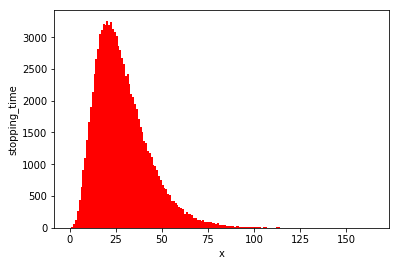

In [13]:
fig, ax = plt.subplots(1,1)

bins = 165

H0 = ax.hist(Sample, bins = bins, alpha=1.0, histtype= 'stepfilled', color='red')
ax.set_xlabel("x")
ax.set_ylabel("stopping_time")

### Question 6

In [14]:
def matrix_power(M, n):
    """Recursive matrix exponentiation.
       Returns M (matrix) multiplied by itself n times.

       Parameters
       ----------
       M: a square numpy array.
       n: non-negative integer.

    """

    ## This will return an identity matrix of the
    ## right shape and type if n=0.

    if n == 0: return np.identity(len(M), dtype=M.dtype)

    ##  YOUR CODE HERE ##
    if n%2 == 0: return matrix_power(M,n/2).dot(matrix_power(M, n/2))
    elif n%2 != 0: return M.dot(matrix_power(M,n-1))

### Question 7

In [15]:
F = np.ones(4)
F[3] = 0
F.shape = (2,2)
print("F: ")
print(F)
F42 = matrix_power(F,42)
print("F42: ")
print(F42)

F: 
[[1. 1.]
 [1. 0.]]
F42: 
[[4.33494437e+08 2.67914296e+08]
 [2.67914296e+08 1.65580141e+08]]


###  Question 8

In [16]:
def T(x):
    """
    Returns 9th-order polynomial.

    Parameters
    ----------
    x: int, float, or numpy array

    """
    ##  YOUR CODE HERE    ##
    return 256 * x ** 9 - 576 * x ** 7 + 432 * x ** 5 - 120 * x ** 3 + 9 * x
    ## ONLY 1 LINE NEEDED ##

In [17]:
def U(x): 
    """
    Returns 8th-order polynomial.
    
    Parameters
    ----------
    x: int, float, or numpy array
    
    """
    
    ##  YOUR CODE HERE    ##
    return 2304*x**8-4032*x**6+2160*x**4-360*x**2+9
    ## ONLY 1 LINE NEEDED ##
    

Text(0,0.5,'$U(x)$')

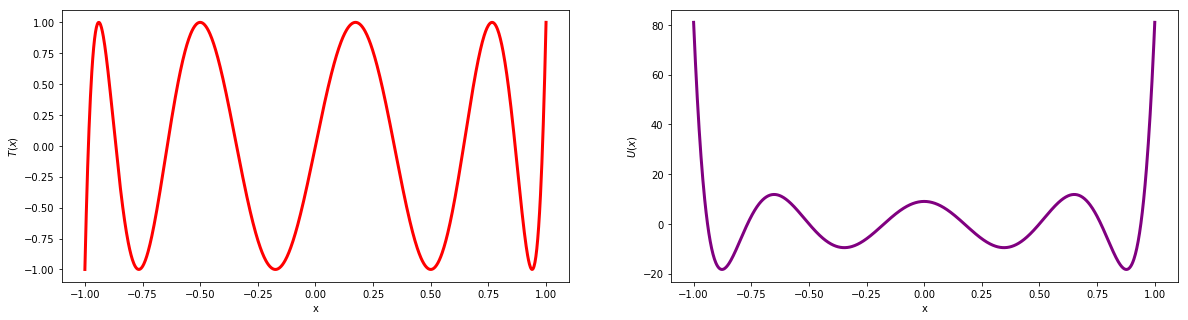

In [18]:
##  MAKE PLOTS HERE ##
x=np.linspace(-1,1,1000)

fig, ax = plt.subplots(1,2,figsize=(20,5))

ax[0].plot(x,T(x), lw=3, color = 'red')
ax[0].set_xlabel('x')
ax[0].set_ylabel('$T(x)$')

ax[1].plot(x,U(x), lw=3, color = 'purple')
ax[1].set_xlabel('x')
ax[1].set_ylabel('$U(x)$')

### Question 9

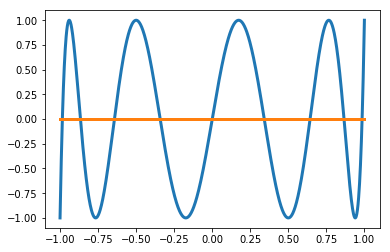

In [19]:
fig, ax = plt.subplots()
x = np.linspace(-1,1,1000)
ax.plot(x, T(x), lw=3)
ax.plot(x, 0*x, lw=3)

According to the plot the initial guess for this equation will be:

In [22]:
Initial_guesses=[-1,0.5*(-1-.75),0.5*(-.75-.5),0,0.5*(.5+.25),0.5*(.5+.75),0.5*(.75+1),1]

In [23]:
def root(x):
    error = 1e-8
    
    while error > 1e-12:
        xnew = x - T(x)/U(x)
        error = abs(xnew - x)
        if error < 1e-12:
            return error, xnew
        x = xnew

In [30]:
result = np.zeros(len(Initial_guesses))
error_result = np.zeros(len(Initial_guesses))

for i in range(len(Initial_guesses)):
    sol = root(Initial_guesses[i])
    error_result[i] = sol[0]
    result[i] = sol[1]

print("After Newton's iteration:")
print(" ")
print("Result : ")
print(result)
print(" ")
print("Error For the result : ")
print(error_result)

After Newton's iteration:
 
Result : 
[-0.98480775 -0.8660254  -0.64278761  0.          0.34202014  0.64278761
  0.8660254   0.98480775]
 
Error For the result : 
[3.33066907e-16 1.44328993e-15 4.55191440e-15 0.00000000e+00
 6.82787160e-15 4.55191440e-15 1.44328993e-15 3.33066907e-16]


### Question 10

In [35]:
def simp(f,x):
    
    #get endpoints, and number of *intervals*
    a, b, n = x[0], x[-1], len(x)-1
    
    h = (b-a)/n
    
    # Check to make sure Simpsons rule will work
    if n%2 == 1:
        raise ValueError("You have an odd number of intervals, an even number of points, and even an odd personality!")
    
    # get the (o)dd and (e)ven points out the middle
    o, e = x[1:-1:2], x[2:-1:2]
    
    return (h/3)*( f(a) + 2*np.sum(f(e)) + 4*np.sum(f(o)) + f(b))
    
    

### Question 11

In [37]:
## YOUR CODE HERE  ##
N=1000

error = []
n = np.arange(11,N+1)
n=n[0:-1:2]
for item in n:
    x=np.linspace(-1,1,item)
    I=simp(U,x)
    error.append(abs(I-2)/2)
## APPROX. 6 LINES ##



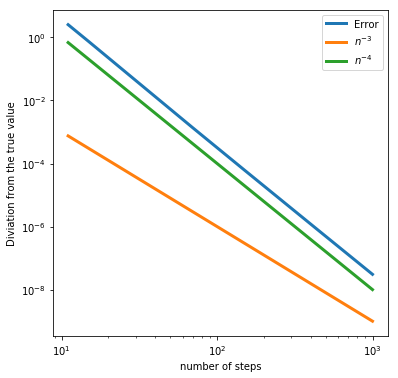

In [40]:
##  MAKE PLOT HERE ##
fig, ax = plt.subplots(figsize=(6,6))

ax.loglog(n,error,n,1/(n**3),n,10000/(n**4), lw=3)

ax.set_xlabel('number of steps')
ax.set_ylabel('Diviation from the true value')
ax.legend(['Error','$n^{-3}$','$n^{-4}$'])


### Question 12

In [41]:
### PUT CODE HERE ###

# 2nd-derivative matrix with Dirichlet boundary conditions
def D2(n):
    D = np.zeros((n,n))
    for i in range(1,n-1): D[i,i-1:i+2] = np.array([1,-2,1])*(n-1)**2
    D[0,0] = D[-1,-1] = 1
    return D

def Newton_update(D,u,a=1,report=True): 
    L = np.diag(np.exp(a*u))
    R = 1 + (u-1)*np.exp(a*u)
    L[0] = L[-1] = R[0] = R[-1] = 0
    L += D
    v = np.linalg.solve(L,R)
    if report: print('average relative change: %3.3e' %(np.sum(np.abs(u-v))/np.sum(np.abs(v))))
    return v
    

print(D2(5))

[[  1.   0.   0.   0.   0.]
 [ 16. -32.  16.   0.   0.]
 [  0.  16. -32.  16.   0.]
 [  0.   0.  16. -32.  16.]
 [  0.   0.   0.   0.   1.]]


In [46]:
### PUT CODE HERE ###

class RK4():
    
    def __init__(self,start,forcing,time=0):
        self.time = [time]
        self.data = [start]
        self.RHS  = forcing
        
    def __call__(self,dt):
        
        self.time += [ self.time[-1] + dt ]
        
        x = self.data[-1]
        f = self.RHS
        
        i1 = (dt/2)*f(x)
        i2 = (dt/2)*f(x+i1)
        i3 =   (dt)*f(x+i2)
        i4 = (dt/2)*f(x+i3)
        
        self.data += [ x + (1/3)*( i1 + 2*i2 + i3 + i4 ) ]
    
    def state(self,time=True):
        if time: return np.array(self.time), np.array(self.data).T 
        return np.array(self.data).T
    
    def now(self):
        return self.time[-1]

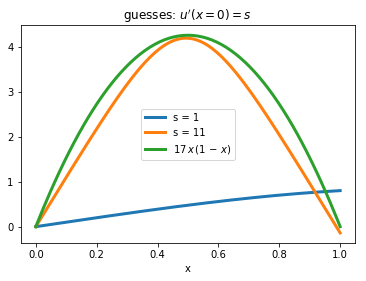

In [47]:
def RK_guess(slope,a=1):
    
    def f(z): return np.array([z[1],1-np.exp(a*z[0])])
    solver        = RK4(np.array([0,slope]),f)
    while solver.now() < 1 : solver(1/128)
    x, z  = solver.state()
    
    return x, z[0]

x, u1  = RK_guess(1)
x, u11 = RK_guess(11)


fig, ax = plt.subplots()

ax.plot(x,u1, lw=3);
ax.plot(x,u11, lw=3);

ax.plot(x,17*x*(1-x), lw = 3);

ax.set_xlabel('x');
ax.set_title('guesses: $u^{\prime}(x=0) = s$');
ax.legend(['s = 1','s = 11','$17\,x\,(1\,-\,x)$']);

In [48]:
n = 100
x = np.linspace(0,1,n)
D = D2(n)

# initial Newton guess
u = 17*x*(1-x)

for i in range(6): u = Newton_update(D,u)

average relative change: 1.403e-01
average relative change: 1.020e-02
average relative change: 7.823e-04
average relative change: 1.274e-06
average relative change: 4.458e-12
average relative change: 1.015e-14


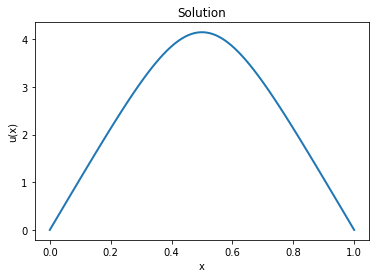

In [49]:
fig, ax = plt.subplots()
ax.plot(x,u,lw=2);
ax.set_xlabel('x')
ax.set_ylabel('u(x)')
ax.set_title('Solution');

### Question 13

In [50]:
### PUT CODE HERE ###

def f1(z): return np.array([z[1],1-np.exp(z[0])])

initial_data = np.array([0,1])
solver       = RK4(initial_data,f1)

dt = 1/64
while solver.now() < 32: 
    solver(dt)
    
t, z1 = solver.state()

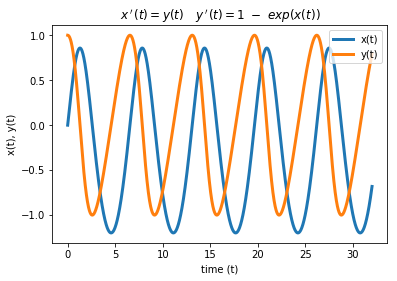

In [51]:
## MAKE PLOT HERE ##

fig, ax = plt.subplots()

ax.plot(t,z1[0],lw=3)
ax.plot(t,z1[1],lw=3);

ax.set_xlabel('time (t)')
ax.set_ylabel('x(t), y(t)')

ax.legend(['x(t)','y(t)']);
ax.set_title('$x^{\,\prime\,}(t) = y(t) \quad y^{\,\prime\,}(t) = 1 \ - \ exp(x(t))$');

Text(0.5,1,'$\\alpha\\ = \\ 1$')

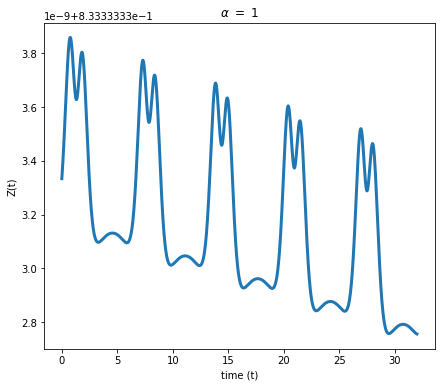

In [52]:
def Z(z): return (1/2)*z[1]**2 + np.exp(z[0]) - z[0] - 2/3

Z1  = Z(z1)
# Z10 = Z(z10,a=10)

fig, ax = plt.subplots(1,1,figsize=(7,6))

ax.plot(t,Z1,lw=3);
ax.set_xlabel('time (t)')
ax.set_ylabel('Z(t)')
ax.set_title('$\\alpha\ = \ 1$')

# ax[1].plot(t,Z10);
# ax[1].set_xlabel('time (t)')
# ax[1].set_ylabel('Z(t)');
# ax[1].set_title('$\\alpha\ = \ 10$');

### Question 14

In [62]:
dt = 1/64
while solver.now() < 4096: 
    solver(dt)
    
t2, z2 = solver.state()

Text(0.5,1,'$\\ t\\ = \\ 4096$')

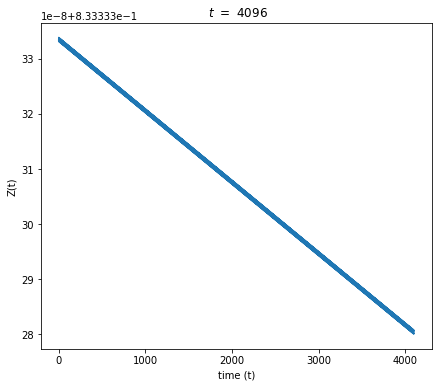

In [64]:
Z2  = Z(z2)

fig, ax = plt.subplots(1,1,figsize=(7,6))

ax.plot(t2,Z2);
ax.set_xlabel('time (t)')
ax.set_ylabel('Z(t)')
ax.set_title('$\ t\ = \ 4096$')